In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/user/titanic.csv", index_col = 0)
print (df)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df_1=df.drop('Cabin',axis=1)
df_1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [5]:
df_1['Age'].fillna(df_1['Age'].median(),inplace=True)
df_1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [6]:
df_2=df.drop('Cabin',axis=1)
df_2=df_2.dropna()
df_2 = df_2.astype({'Age' : 'int64'})

In [7]:
df_2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [8]:
df_2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S


Text(0.5, 1.0, 'Pclass count')

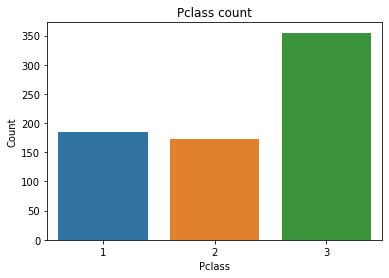

In [163]:
sns.countplot(data=df_2, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass count")

Text(0.5, 1.0, 'Survived or Not')

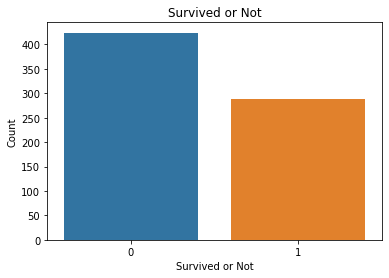

In [164]:
sns.countplot(data = df_2, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived or Not")

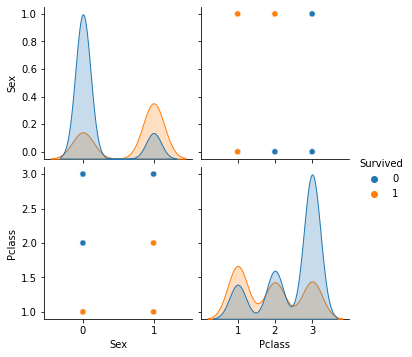

In [165]:
sns.pairplot(df_2,
             vars=['Sex', 'Pclass'],
            hue ='Survived')
plt.show()

Text(0.5, 1.0, 'Survived per Pclass')

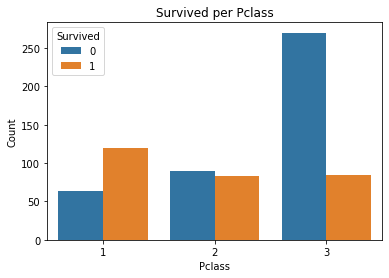

In [167]:
sns.countplot(data=df_2, x="Pclass", hue="Survived")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survived per Pclass")

In [9]:
b=df_2[['Survived']]
b.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [10]:
df_2 = df_2.replace({'male':0, 'female':1})

In [11]:
df_2 = df_2.astype({'Sex' : 'int64'})

In [12]:
df_2 = df_2.astype({'Age' : 'int64'})

In [13]:
df_2 = df_2.replace({'S':0, 'C':1, 'Q':2})

In [14]:
a=df_2.drop(['Survived', 'Name', 'Ticket'], axis=1)
a.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22,1,0,7.2500,0
2,1,1,38,1,0,71.2833,1
3,3,1,26,0,0,7.9250,0
4,1,1,35,1,0,53.1000,0
5,3,0,35,0,0,8.0500,0


In [15]:
#Splitting the data into training and test test
X = a.iloc[:,0:7].values
y = df_2.iloc[:,0:1].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
X

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ...,  0.    , 30.    ,  0.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [158]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(30,input_shape=(7,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 30)                240       
                                                                 
 dense_97 (Dense)            (None, 20)                620       
                                                                 
 dense_98 (Dense)            (None, 10)                210       
                                                                 
 dense_99 (Dense)            (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [159]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 1.0574 - accuracy: 0.6063 - val_loss: 0.6549 - val_accuracy: 0.6643
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6643 - val_loss: 0.6618 - val_accuracy: 0.6154
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6907 - val_loss: 0.6606 - val_accuracy: 0.6573
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6731 - val_loss: 0.6435 - val_accuracy: 0.6713
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6819 - val_loss: 0.6132 - val_accuracy: 0.6713
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6995 - val_loss: 0.6245 - val_accuracy: 0.6573
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7170 - val_loss: 0.6208 - val_accuracy: 0.6713
Epoch 8/100
1

Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.7996 - val_loss: 0.4546 - val_accuracy: 0.7762
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7979 - val_loss: 0.4666 - val_accuracy: 0.7692
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8137 - val_loss: 0.4553 - val_accuracy: 0.7902
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8049 - val_loss: 0.4459 - val_accuracy: 0.8182
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8102 - val_loss: 0.4378 - val_accuracy: 0.8112
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8137 - val_loss: 0.4498 - val_accuracy: 0.8182
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8032 - val_loss: 0.4739 - val_accuracy: 0.7483
Epoch 

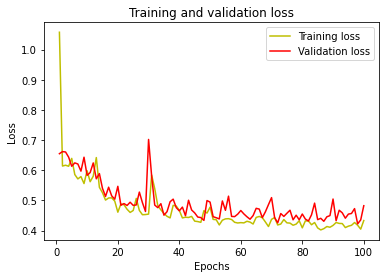

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

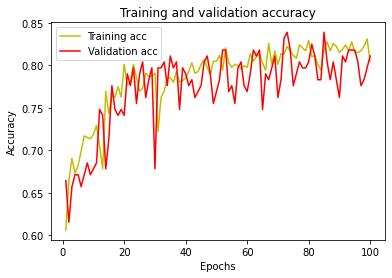

In [161]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [162]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        82
           1       0.74      0.85      0.79        61

    accuracy                           0.81       143
   macro avg       0.81      0.82      0.81       143
weighted avg       0.82      0.81      0.81       143

[[64 18]
 [ 9 52]]
